<a href="https://colab.research.google.com/github/un1qqe/Image-Generation/blob/main/Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://vizwiz.cs.colorado.edu/VizWiz_final/images/val.zip

--2024-06-03 13:44:21--  https://vizwiz.cs.colorado.edu/VizWiz_final/images/val.zip
Resolving vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)... 198.59.7.50
Connecting to vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)|198.59.7.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3488913457 (3.2G) [application/zip]
Saving to: ‘val.zip’

val.zip             100%[===================>]   3.25G  16.4MB/s    in 3m 21s  

2024-06-03 13:47:43 (16.6 MB/s) - ‘val.zip’ saved [3488913457/3488913457]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-06-03 13:47:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-03 13:47:43 (141 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://vizwiz.cs.colorado.edu/VizWiz_final/images/train.zip

--2024-06-03 13:47:43--  https://vizwiz.cs.colorado.edu/VizWiz_final/images/train.zip
Resolving vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)... 198.59.7.50
Connecting to vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)|198.59.7.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11298421598 (11G) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  10.52G  20.0MB/s    in 9m 31s  

2024-06-03 13:57:15 (18.9 MB/s) - ‘train.zip’ saved [11298421598/11298421598]



In [ ]:
!wget https://vizwiz.cs.colorado.edu/VizWiz_final/images/test.zip

--2024-06-03 13:57:15--  https://vizwiz.cs.colorado.edu/VizWiz_final/images/test.zip
Resolving vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)... 198.59.7.50
Connecting to vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)|198.59.7.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975272799 (3.7G) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]   3.70G  19.9MB/s    in 3m 15s  

2024-06-03 14:00:31 (19.4 MB/s) - ‘test.zip’ saved [3975272799/3975272799]



In [ ]:
!wget https://vizwiz.cs.colorado.edu/VizWiz_final/caption/annotations.zip

--2024-06-03 14:00:31--  https://vizwiz.cs.colorado.edu/VizWiz_final/caption/annotations.zip
Resolving vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)... 198.59.7.50
Connecting to vizwiz.cs.colorado.edu (vizwiz.cs.colorado.edu)|198.59.7.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4509069 (4.3M) [application/zip]
Saving to: ‘annotations.zip’

annotations.zip     100%[===================>]   4.30M  2.90MB/s    in 1.5s    

2024-06-03 14:00:34 (2.90 MB/s) - ‘annotations.zip’ saved [4509069/4509069]



In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import pandas as pd
import os
from helper_functions import unzip_data
import numpy as np

In [ ]:
unzip_data('/content/val.zip')
unzip_data('/content/train.zip')
unzip_data('/content/test.zip')
unzip_data('/content/annotations.zip')

In [ ]:
val_filepath='/content/val'
train_filepath='/content/train'
test_filepath='/content/test'

VizWiz_train_00010418.jpg


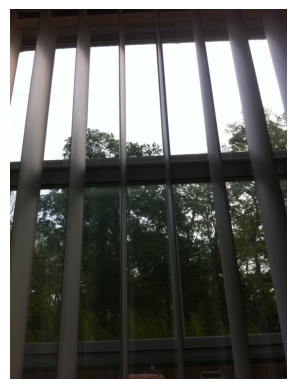

In [ ]:
random_path=random.choice(os.listdir(train_filepath))
img=plt.imread(train_filepath+'/'+random_path)
view=plt.imshow(img)
plt.axis('off')
print(random_path)

In [ ]:
import json
annotations_train='/content/annotations/train.json'
annotations_test='/content/annotations/test.json'
annotations_val='/content/annotations/val.json'
with open(annotations_train,'r') as tr:
  train_annotations=json.load(tr)
with open(annotations_test,'r') as ts:
  test_annotations=json.load(ts)
with open(annotations_val,'r') as vl:
  val_annotations=json.load(vl)

train_annotations['annotations']

In [ ]:
train_annotations_only=pd.DataFrame(train_annotations['annotations'])

In [ ]:
val_annotations_only=pd.DataFrame(val_annotations['annotations'])

In [ ]:
train_captions=train_annotations_only[['caption','image_id']]
val_captions=val_annotations_only[['caption','image_id']]

In [ ]:
val_imgs=[]
for sample in os.listdir(val_filepath):
  val_imgs.append(f'/content/val/{sample}')


In [ ]:
import ast

In [ ]:
grouped_val_captions=val_captions.groupby('image_id')['caption'].apply(list).reset_index()
val_captions_list=grouped_val_captions['caption'].tolist()
val_captions_list=[str(text).lower() for text in val_captions_list]

In [ ]:
val_df=pd.DataFrame([sorted(val_imgs),val_captions_list]).transpose().dropna()

In [ ]:
train_imgs=[]
for sample in os.listdir(train_filepath):
  train_imgs.append(f'/content/train/{sample}')

grouped_train_captions=train_captions.groupby('image_id')['caption'].apply(list).reset_index()
train_captions_list=grouped_train_captions['caption'].tolist()
train_captions_list=[str(text).lower() for text in train_captions_list]
train_df=pd.DataFrame([sorted(train_imgs),train_captions_list]).transpose().dropna()

In [ ]:
new_names={0:'img_path',1:'captions'}
train_df=train_df.rename(columns=new_names)
val_df=val_df.rename(columns=new_names)

In [ ]:
from ast import literal_eval

train_df['captions'] = train_df['captions'].apply(literal_eval)
val_df['captions'] = val_df['captions'].apply(literal_eval)


(1632, 1224, 3)


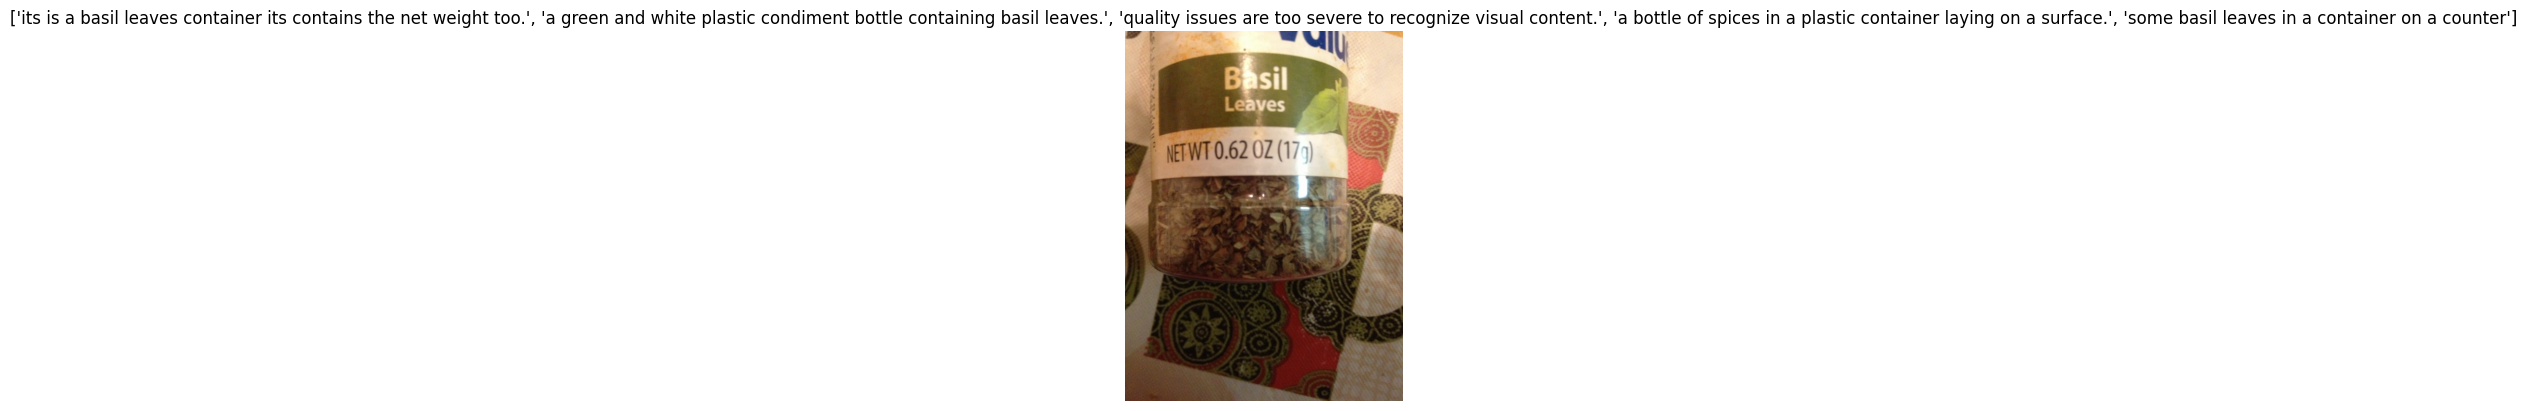

In [ ]:
random_index=random.randint(0,23431)
img=plt.imread(train_df['img_path'][0])
plt.imshow(img)
plt.axis('off')
plt.title(train_df['captions'][0])
print(img.shape)

In [ ]:
def decode(img_path):
  img=tf.io.read_file(img_path)
  img=tf.image.decode_jpeg(img,channels=3)
  return img

In [ ]:
def resize(img):
  img=tf.image.resize(img,(64,64))
  return img

In [ ]:
def normalize(img):
  img=tf.cast(img,tf.float32)
  img=(img/127.5)-1
  return img

In [ ]:
def load_train(img_path):
  train_img=decode(img_path)
  train_img=resize(train_img)
  train_img=normalize(train_img)
  return train_img

In [ ]:
def load_val(img_path):
  val_img=decode(img_path)
  val_img=resize(val_img)
  val_img=normalize(val_img)
  return val_img

In [ ]:
test_inp_path=train_df['img_path'][0]
inp=load_train(test_inp_path)

In [ ]:
inp.shape

TensorShape([64, 64, 3])

In [ ]:
train_img_dataset=tf.data.Dataset.list_files(str('/content/train/VizWiz_train_*.jpg'),shuffle=False)
train_img_dataset=train_img_dataset.map(load_train,
                                num_parallel_calls=tf.data.AUTOTUNE)


In [ ]:
val_img_dataset=tf.data.Dataset.list_files(str('/content/val/VizWiz_val_*.jpg'),shuffle=False)
val_img_dataset=val_img_dataset.map(load_val,
                            num_parallel_calls=tf.data.AUTOTUNE)


In [ ]:
243*32

7776

In [ ]:
len(train_img_dataset)

23954

In [ ]:
captions_train_list=[str(i) for i in train_df['captions'].tolist()]

In [ ]:
captions_val_list=[str(i) for i in val_df['captions'].tolist()]

In [ ]:
sent_len = [len(str(sent).split()) for sent in captions_train_list if str(sent).strip()]
max_sent_len=max(sent_len)

In [ ]:
max_sent_len

160

In [ ]:
vocabulary_size=20000
tokenizer=tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize='lower_and_strip_punctuation',
    output_sequence_length=128
)

In [ ]:
tokenizer.adapt(captions_train_list)

In [ ]:
from tensorflow.keras import mixed_precision

In [ ]:
train_captions=tf.data.Dataset.from_tensor_slices(captions_train_list)
val_captions=tf.data.Dataset.from_tensor_slices(captions_val_list)


train_dataset=tf.data.Dataset.zip((train_img_dataset,train_captions))
val_dataset=tf.data.Dataset.zip((val_img_dataset,val_captions))

train_dataset=train_dataset.batch(16)
val_dataset=val_dataset.batch(16)

train_dataset=train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
val_dataset=val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE).cache()


In [ ]:
train_dataset

<CacheDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [ ]:
tokenizer.vocabulary_size()

19124

In [ ]:
tokenizer.get_vocabulary()[1:10]

['[UNK]', 'a', 'of', 'on', 'the', 'with', 'and', 'to', 'is']

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2024-06-03 14:11:14--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-03 14:11:15--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.83MB/s    in 2m 39s  

2024-06-03 14:13:55 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
unzip_data('/content/glove.6B.zip')

In [ ]:
def load_glove(path):
  embeddings_index={}
  with open(path) as f:
    for line in f:
      word,coefs=line.split(maxsplit=1)
      coefs=np.fromstring(coefs,'f',sep=' ')
      embeddings_index[word]=coefs
  return embeddings_index


In [ ]:
glove_file_path='/content/glove.6B.50d.txt'
glove_embeddings=load_glove(glove_file_path)

In [ ]:
voc=tokenizer.get_vocabulary()
vocab_dict=dict(zip(voc,range(len(voc))))

In [ ]:
len(vocab_dict)

19124

In [ ]:
def create_embedding_matrix(num_tokens=len(voc)+2,embedding_dim=50,vocab_dict=vocab_dict):
  embedding_matrix=np.zeros((num_tokens,embedding_dim))
  hits=0
  misses=0
  for word,i in vocab_dict.items():
    embedding_vector=glove_embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[i]=embedding_vector
      hits+=1
    else:
      misses+=1
  print(f'Converted %d words (%d misses)' % (hits,misses))
  return embedding_matrix

In [ ]:
embedding_matrix=create_embedding_matrix()

Converted 16287 words (2837 misses)


In [ ]:
embedding_matrix=tf.cast(embedding_matrix,tf.float32)

In [ ]:
embedding_matrix.dtype

tf.float32

In [ ]:
embedding_matrix.shape

TensorShape([19126, 50])

In [ ]:
len(glove_embeddings)

400000

In [ ]:
len(embedding_matrix)

19126

In [ ]:
captions_train_list[0]

"['its is a basil leaves container its contains the net weight too.', 'a green and white plastic condiment bottle containing basil leaves.', 'quality issues are too severe to recognize visual content.', 'a bottle of spices in a plastic container laying on a surface.', 'some basil leaves in a container on a counter']"

In [ ]:
embedding_matrix

<tf.Tensor: shape=(19126, 50), dtype=float32, numpy=
array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.21705 ,  0.46515 , -0.46757 , ..., -0.043782,  0.41013 ,
         0.1796  ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)>

In [ ]:
from keras import layers

In [ ]:
from transformers import BertTokenizer

In [ ]:
class GloveEmbedding(tf.keras.layers.Layer):
  def __init__(self,num_units,vocab_size,embedding_dim,embeddings,tokenizer):
    super(GloveEmbedding,self).__init__()
    self.tokenizer=tokenizer
    self.embedding=layers.Embedding(vocab_size,embedding_dim,embeddings_initializer=tf.keras.initializers.Constant(embeddings),trainable=False,mask_zero=False,dtype=tf.float32)
  def call(self,text_inputs):
    tokenized=self.tokenizer(text_inputs)
    embedded=self.embedding(tokenized)
    return embedded

In [ ]:
VOCAB_SIZE=len(voc)+2
EMBEDDING_DIM=50
NUM_UNITS=64
glove_embedding_layer=GloveEmbedding(NUM_UNITS,VOCAB_SIZE,EMBEDDING_DIM,embedding_matrix,tokenizer)

In [ ]:
glove_embedding_layer

In [ ]:
from keras import layers

In [ ]:
def downsample(filters,size,strides):
  initializer = tf.keras.initializers.GlorotNormal()
  result=tf.keras.Sequential([
      layers.Conv2D(filters,size,strides,padding='same',use_bias=False,kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.LeakyReLU()
  ])

  return result


In [ ]:
def upsample(filters, size,strides):
    initializer = tf.keras.initializers.GlorotNormal()
    layer=tf.keras.Sequential([
        layers.Conv2DTranspose(filters, size, strides, padding='same', kernel_initializer=initializer, use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2)

    ])
    return layer

In [ ]:
train_dataset

<CacheDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [ ]:
def Generator():
  inp_txt=layers.Input(shape=(),dtype=tf.string)
  embedding=glove_embedding_layer(inp_txt)

  forward_layer=layers.LSTM(64,return_sequences=True)
  backward_layer=layers.LSTM(64,return_sequences=True,go_backwards=True)

  text_lstm=layers.Bidirectional(forward_layer,backward_layer=backward_layer)(embedding)
  text_layer=layers.LeakyReLU(alpha=0.2)((tf.expand_dims(text_lstm,axis=-1)))
  text_layer = tf.image.resize(text_layer, (64, 64))

  inp_img=layers.Input(shape=(64,64,3),dtype=tf.float32)
  noise=noise = tf.random.normal(shape=(64, 64, 3), mean=0, stddev=5,dtype=tf.float32)
  noise_img=inp_img+noise
  noise_vector = tf.clip_by_value(noise_img, -1.0, 1.0)

  concat=layers.Concatenate()([text_layer,noise_vector])



  downstack=[
      downsample(256,4,1),
      downsample(256,4,2),
      downsample(256,4,2),
      downsample(256,4,2),
      downsample(128,4,2),
      downsample(64,4,2),
      downsample(32,4,2)
  ]



  upstack=[
      upsample(256,3,2),
      upsample(256,3,2),
      upsample(256,3,2),
      upsample(256,3,2),
      upsample(128,3,2),
      upsample(128,3,2),
      upsample(64,3,2),
      upsample(32,3,2)
  ]


  initializer = tf.keras.initializers.GlorotNormal()
  out=layers.Conv2DTranspose(3,1,1,padding='same',use_bias=False,activation='sigmoid',kernel_initializer=initializer)

  x=concat

  skips=[]

  for down in downstack:
    x=down(x)
    skips.append(x)

  skips=reversed(skips[:-1])

  for up,skip in zip(upstack,skips):
    x=up(x)
    x=tf.keras.layers.Concatenate()([x,skip])

  x=out(x)



  return tf.keras.Model(inputs=[inp_txt,inp_img],outputs=x)


In [ ]:
generator=Generator()

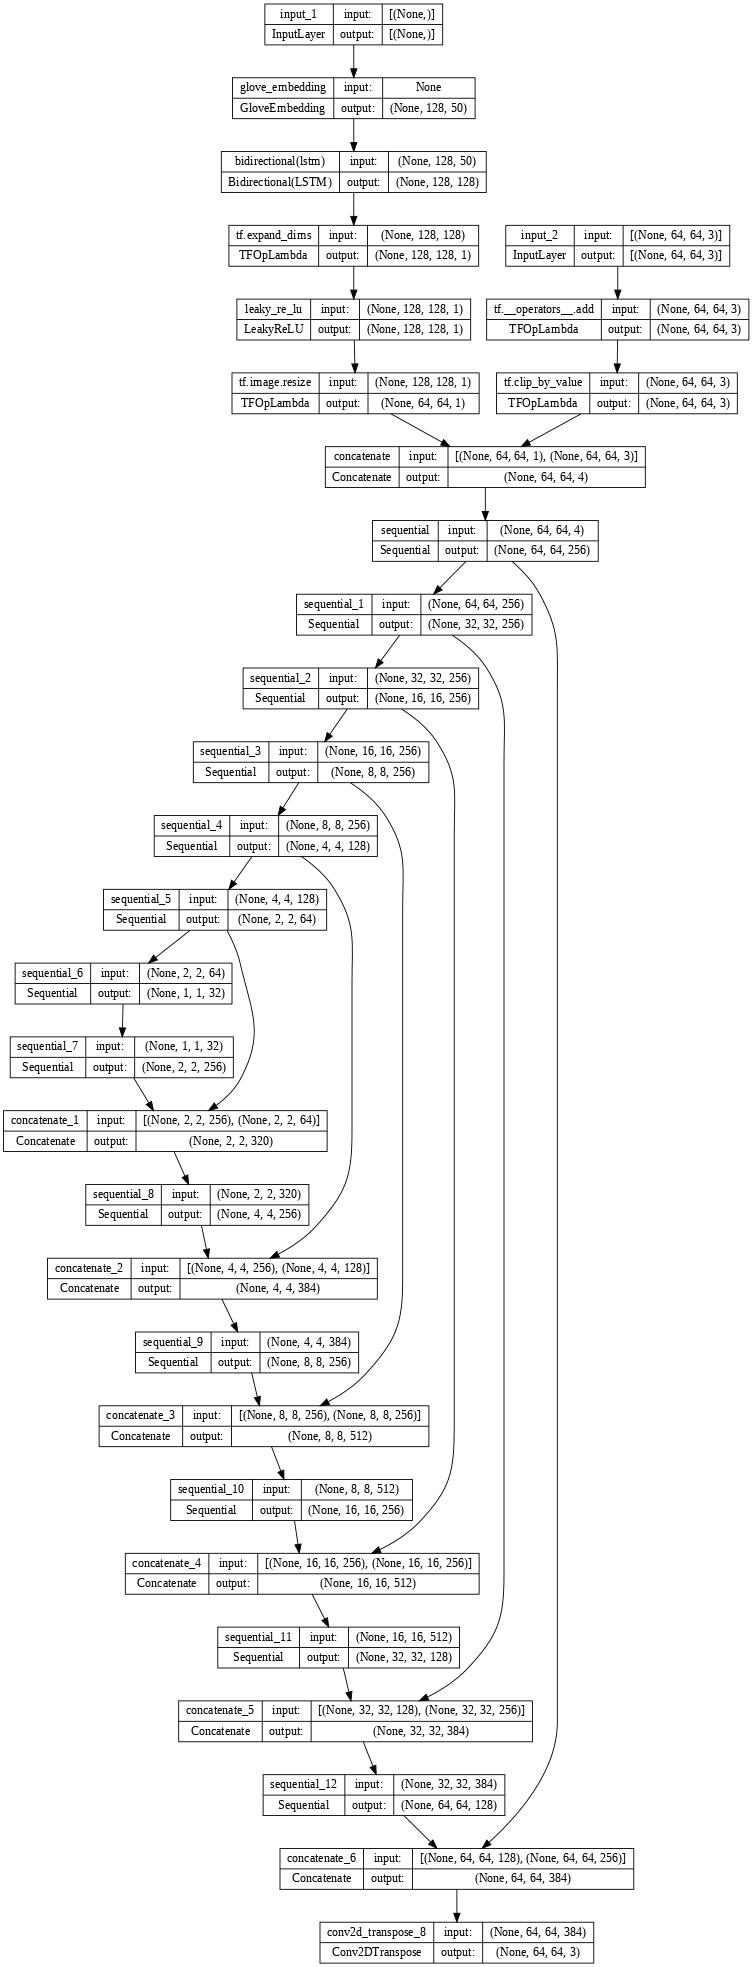

In [ ]:
tf.keras.utils.plot_model(generator,show_shapes=True,dpi=64)

In [ ]:
def Discriminator():
  initializer=tf.random_normal_initializer(0.,0.02)
  inp_img=layers.Input(shape=(64,64,3),dtype=tf.float32)
  inp_txt=layers.Input(shape=(),dtype=tf.string)


  forward_layer=layers.LSTM(64,return_sequences=True)
  backward_layer=layers.LSTM(64,return_sequences=True,go_backwards=True)


  embedding=glove_embedding_layer(inp_txt)
  bid_layer=layers.Bidirectional(forward_layer,backward_layer=backward_layer)(embedding)
  text_layer=layers.LeakyReLU(alpha=0.2)((tf.expand_dims(bid_layer,axis=-1)))
  text_layer = tf.image.resize(text_layer, (64, 64))


  x=tf.keras.layers.Concatenate()([inp_img,text_layer])

  down1=downsample(32,4,1)(x)
  down2=downsample(64,4,2)(down1)
  down3=downsample(128,4,2)(down2)
  down4=downsample(256,4,2)(down3)
  down5=downsample(256,4,2)(down4)
  down6=downsample(256,4,2)(down5)

  conv=tf.keras.layers.Conv2D(512,2,strides=2,kernel_initializer=initializer,use_bias=False)(down6)

  batchnorm1=layers.BatchNormalization()(conv)

  leaky_relu=layers.LeakyReLU()(batchnorm1)

  flatten=layers.Flatten()(leaky_relu)

  last=layers.Dense(1,activation='sigmoid')(flatten)

  return tf.keras.Model(inputs=[inp_img,inp_txt],outputs=last)





In [ ]:
discriminator=Discriminator()

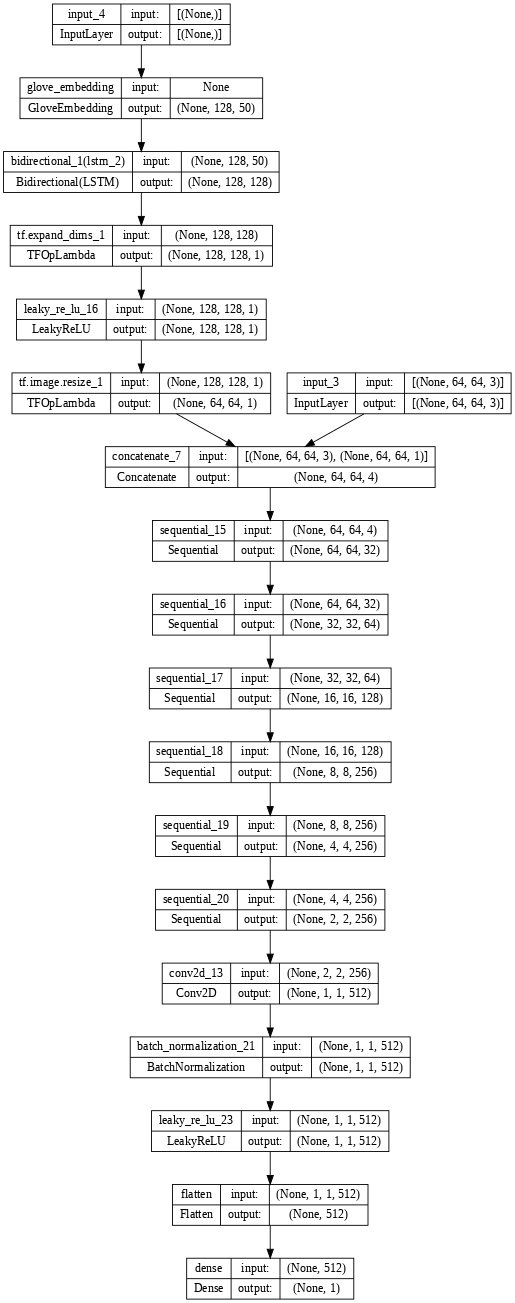

In [ ]:
tf.keras.utils.plot_model(discriminator,dpi=64,show_shapes=True)

In [ ]:
loss_object=tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [ ]:
def generator_loss(disc_generated_output,gen_output,target):
  gan_loss=loss_object(tf.ones_like(disc_generated_output),disc_generated_output)

  l1_loss=tf.reduce_mean(tf.abs(target-gen_output))

  total_gen_loss=gan_loss+(100*l1_loss)

  return total_gen_loss,gan_loss,l1_loss

In [ ]:
def discriminator_loss(disc_real_inp,disc_gen_inp):
  real_loss=loss_object(tf.ones_like(disc_real_inp),disc_real_inp)
  generated_loss=loss_object(tf.zeros_like(disc_gen_inp),disc_gen_inp)
  total_disc_loss=real_loss+generated_loss
  return total_disc_loss


In [ ]:
generator_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005)
discriminator_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005)


In [ ]:
def generate_images(model,dataset):
  for img,txt in dataset.take(1):
    prediction=model(((txt,img)),training=True)
  plt.figure(figsize=(5,5))
  display_list=[prediction[12],img[12]]
  title=['predicted_image','real_image']

  for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(title[i])
    plt.imshow(display_list[i])
    plt.axis('off')
  print(txt[11])
  plt.show()
  return prediction





tf.Tensor(b'[\'imagine how you would describe this image on the phone to a friend.\', "the photographer\'s hand holding a round bottle with a black lid.", "canned food held by a man\'s fingers with the thumb visible", \'a person holding a food can with the rear of the label facing forward.\', "a white man\'s hand holding a vitamin bottle."]', shape=(), dtype=string)


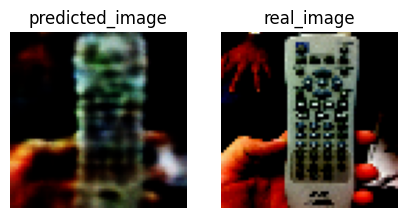

In [ ]:
test_image=generate_images(generator,train_dataset)

In [ ]:

import datetime
log_dir='logs/'
summary_writer=tf.summary.create_file_writer(
    log_dir+'fit/'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
)

In [ ]:
#@tf.function(reduce_retracing=True)
def trainstep(input_text, target_image, step):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator([input_text,target_image], training=True)
        disc_real_output = discriminator([target_image, input_text], training=True)
        disc_generated_output = discriminator([gen_output, input_text], training=True)
        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target_image)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_total_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(gen_total_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    with summary_writer.as_default():
        tf.summary.scalar('gen_total_loss', tf.reduce_mean(gen_total_loss), step=step // 1000)
        tf.summary.scalar('gen_gan_loss',  tf.reduce_mean(gen_gan_loss), step=step // 1000)
        tf.summary.scalar('gen_l1_loss',  tf.reduce_mean(gen_l1_loss), step=step // 1000)
        tf.summary.scalar('disc_loss',  tf.reduce_mean(disc_loss), step=step // 1000)

In [ ]:
import time
from IPython import display

In [ ]:
checkpoint_dir='/content/checkpoints/'
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')
checkpoint=tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                               discriminator_optimizer=discriminator_optimizer,
                               generator=generator,
                               discriminator=discriminator)

In [ ]:
def fit(train_ds,epochs):
  for step,(image,text) in train_ds.repeat().take(epochs).enumerate():
    print(f'Step {step}')
    if image.shape[0]==text.shape[0]:
      trainstep(text,image,step=step)
    if (step+1)%5000==0:
      checkpoint.save(file_prefix=checkpoint_prefix)



In [ ]:
fit(train_dataset,epochs=10000)

tf.Tensor(b'[\'imagine how you would describe this image on the phone to a friend.\', "the photographer\'s hand holding a round bottle with a black lid.", "canned food held by a man\'s fingers with the thumb visible", \'a person holding a food can with the rear of the label facing forward.\', "a white man\'s hand holding a vitamin bottle."]', shape=(), dtype=string)


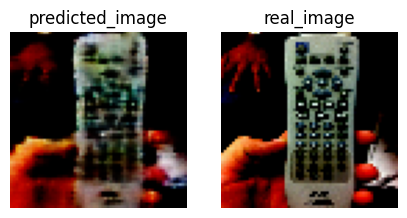

In [ ]:
after_train_test_image=generate_images(generator,train_dataset)